In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open('dataset-nids.pkl','rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3549974, 7), (3549974,), (508003, 7), (508003,))

Tuning best parameters

In [4]:
%%time 

param_grid = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [15, 20, 25],
    "n_estimators": [60, 70, 75],
    "min_samples_split":[1,2,4],
    "min_samples_leaf":[1,2,4]
}

CPU times: user 42 µs, sys: 0 ns, total: 42 µs
Wall time: 68.2 µs


In [5]:
cf = RandomForestClassifier()
cf_cv = GridSearchCV(estimator=cf, param_grid=param_grid, scoring="f1", cv=5)
cf_cv.fit(X_train, y_train)

params = cf_cv.best_params_
score = cf_cv.best_score_

In [6]:
print(params)
print(score)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 75}
0.9929365015395326


Baseline

In [7]:
rfc = RandomForestClassifier(criterion = "gini", max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=75, verbose=1)
rfc_cls = rfc.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 12.9min finished


In [8]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import scikitplot as skplt 
import matplotlib.pyplot as plt

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   12.0s finished


Text(0, 0.5, 'Valores Reais ')

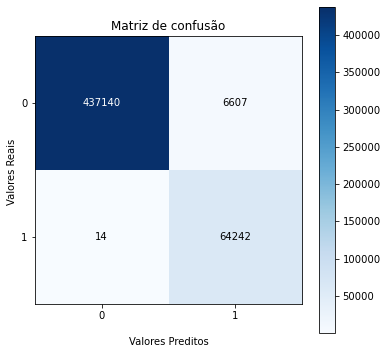

In [9]:
y_pred_opt = rfc_cls.predict(X_test)
ax = skplt.metrics.plot_confusion_matrix(y_test, y_pred_opt, figsize=(6,6))
ax.set_title('Matriz de confusão')
ax.set_xlabel('\nValores Preditos')
ax.set_ylabel('Valores Reais ')

In [10]:
y_pred_proba = rfc_cls.predict_proba(X_test)[::,1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    8.9s finished


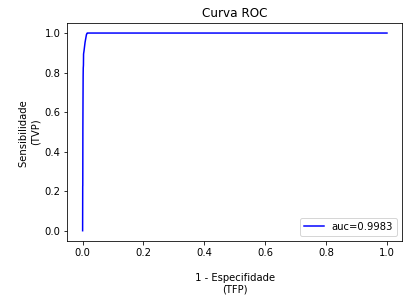

In [12]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,color='blue',label="auc="+str(round(auc,4)))
plt.ylabel('\nSensibilidade \n(TVP)')
plt.xlabel('\n 1 - Especifidade \n(TFP)')
plt.title('Curva ROC')
plt.legend(loc=4)
plt.show()

Cross Validation

In [13]:
X_train = np.concatenate((X_train,X_test), axis = 0)
y_train = np.concatenate((y_train,y_test), axis = 0)

In [14]:
X_train.shape, y_train.shape

((4057977, 7), (4057977,))

In [15]:
from sklearn.model_selection import KFold, cross_validate

In [16]:

metricas = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc' ]
rfc = RandomForestClassifier(criterion = "gini", max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=70, verbose=1)
metricas = cross_validate(rfc, X_train, y_train, cv=10, scoring= metricas)

for met in metricas:
    print(f"- {met}:")
    print(f"-- {metricas[met]}")
    print(f"-- {np.mean(metricas[met])} +- {np.std(metricas[met])}\n")  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed: 12.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    6.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed: 13.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

- fit_time:
-- [731.09776354 822.16338658 787.10580611 747.59304476 690.8983314
 742.36249113 765.09452105 625.89201617 715.12905169 656.54204965]
-- 728.3878462076187 +- 56.04371310000258

- score_time:
-- [17.74088454 18.15037823 15.52439499 15.59517097 14.95180869 15.10664344
 15.86523128 12.37655306 15.96370721 17.81385064]
-- 15.9088623046875 +- 1.6216511341672417

- test_accuracy:
-- [0.99187034 0.99209952 0.99237798 0.99257512 0.9921488  0.99231884
 0.99237798 0.99240014 0.99230403 0.99183089]
-- 0.9922303649931902 +- 0.00022748395739302662

- test_precision:
-- [0.98351563 0.9833583  0.98350793 0.98400655 0.98303463 0.98344385
 0.98360629 0.98364321 0.98343289 0.98504128]
-- 0.9836590562243531 +- 0.0005153211970389227

- test_recall:
-- [0.99880385 0.99948348 0.99995107 0.99986951 0.99993476 0.99988582
 0.99984776 0.99985864 0.99986407 0.99711837]
-- 0.9994617343748814 +- 0.0008486677905731026

- test_f1:
-- [0.99110079 0.99135532 0.99166134 0.99187461 0.99141268 0.99159668
 0.